
The next question we will try to visualise is "what are the average rainfalls in of high rainfall days in lithgow in March".  The right tool for this job is the "box plot" (we've set 20mm as a high rainfall amount). 

<Axes: >

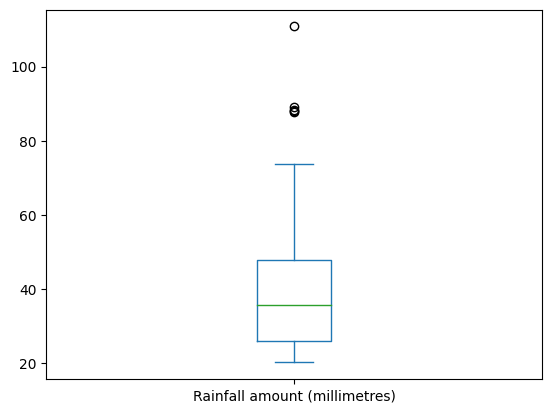

In [1]:
import pandas as pd

rainfall = pd.read_csv("data/rainfall/IDCJAC0009_063292_1800_Data.csv")
choose_2022 = rainfall["Year"] == 2022
amount_2022 = rainfall[choose_2022]["Rainfall amount (millimetres)"]

march = rainfall["Month"] == 3
high_rainfall_day = rainfall["Rainfall amount (millimetres)"] > 20
rainfall[ march & high_rainfall_day]["Rainfall amount (millimetres)"].plot(kind="box")


# Scatter plots can't work on Series

Because they compare one column to another.  Thus this is our first look at plotting directly on the dataframe.

<Axes: xlabel='sepal length', ylabel='sepal width'>

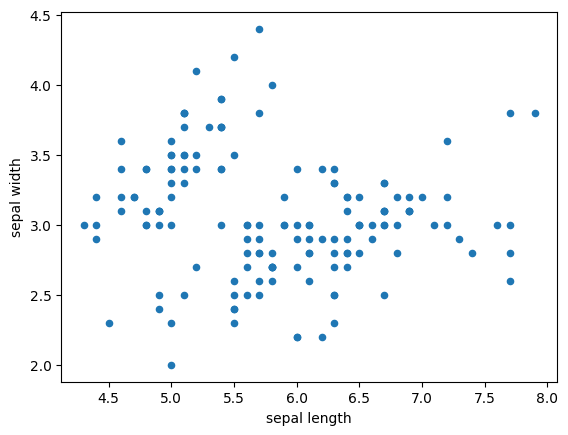

In [2]:
iris = pd.read_csv("data/iris.csv")

iris.plot(kind="scatter", x="sepal length", y="sepal width")

To be honest, I am a little disapointed.  I was expecting a correlation.  Perhaps I should to it per-species?

<Axes: xlabel='sepal length', ylabel='sepal width'>

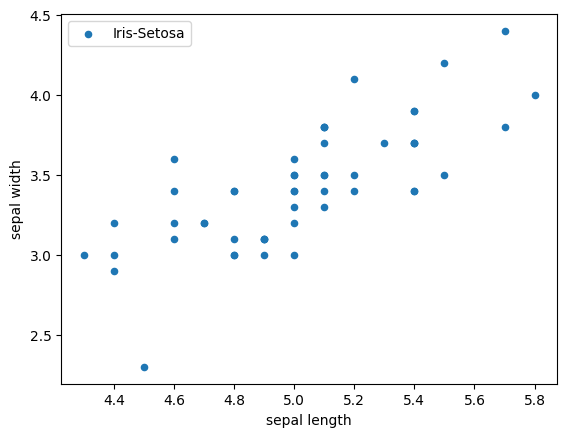

In [3]:
just_setosa = iris["class"] == "Iris-setosa"

iris[just_setosa].plot(kind="scatter", x="sepal length", y="sepal width", label="Iris-Setosa")

much better!

# Exercise - disposal vs handballs

Plot "Handballs" vs "Disposals" from the `data/afl/stats.csv` file as a scatter plot.  Your plot will show you that I chose a bad correlation to look for.  If you follow AFL you will know why :)

In [4]:
# put solution here

Sometimes a scatter plot gets crowded.  A "hexbin" will combine close dots and make a colour to indicate how represented each "bin" is

<Axes: xlabel='Contested Possessions', ylabel='Uncontested Possessions'>

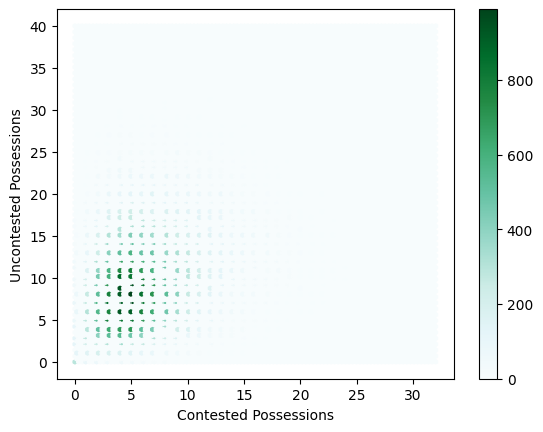

In [5]:
afl = pd.read_csv("data/afl/stats.csv")

afl.plot(kind="hexbin", x="Contested Possessions", y="Uncontested Possessions")

# Exercise - hexbin instead

Redo the last scatter plot (disposals vs handballs) as a hexbin.  The fact that it is an invalid correlation is no longer visible in the plot!  Take this as a lesson on the importance of plot-type.

In [6]:
# put solution here

# You only showed me two plots on data frames!

Most of the plots we learned for Series do sensible things for DataFrames.  I encourage you to guess what they do before experimenting yourself to find out.

# Exercise - many plots at once

Use a box plot directly on the data frame your get from loading the `iris` data set.  Before you do it, make a guess about what it will do.  Did the plot match your expectations?  Based on what you see, without looking up the documentation, can you describe what `plot(kind="box")` does when used on data frame instead of a series?  After you do it once, go back and remove that outlier we found in the last class and plot it again.  The outlier that was hard to find in the table is very obvious in the box plot.

In [7]:
# box plot the whole frame

# Plotting more than one thing

You can "capture" a reference to a plot and then add new plots to it.  The length of the axis will automatically grow to accomodate the new data.  To add a new plot to an existing plot, you pass the reference in as an `ax` parameter.  Here are two examples:
  * All three species of iris included in the one scatter plot.  We see that "setosa" is distinctly different but that all three have a correlation of some sort between width and length
  * The cummulative and daily rainfall on one graph. As we expect, the cummulative rises quickly where the daily is high.

`ax` is for "axis" on which to do this plot.

<Axes: xlabel='sepal length', ylabel='sepal width'>

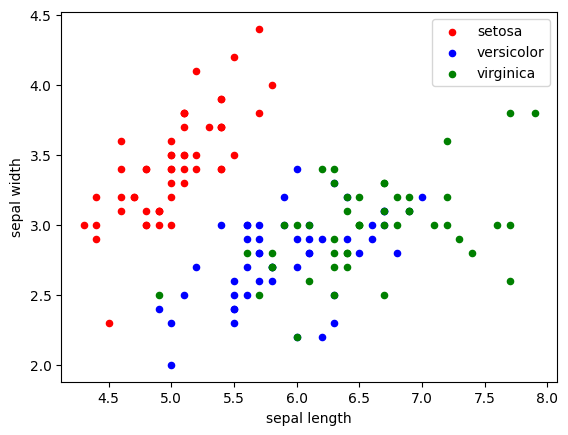

In [8]:
just_setosa = iris["class"] == "Iris-setosa"
just_versicolor = iris["class"] == "Iris-versicolor"
just_virginica = iris["class"] == "Iris-virginica"

existing_plot = iris[just_setosa].plot(kind="scatter", color="Red", x="sepal length", y="sepal width", label="setosa")
iris[just_versicolor].plot(kind="scatter", color="Blue", x="sepal length", y="sepal width", ax=existing_plot, label="versicolor")
iris[just_virginica].plot(kind="scatter", color="Green", x="sepal length", y="sepal width", ax=existing_plot, label="virginica")

In [9]:
rainfall_plot = cummulative_2022.plot()
amount_2022.plot(ax=rainfall_plot)

NameError: name 'cummulative_2022' is not defined